# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

mouse_metadata_df.head()
study_results_df.head()
# Combine the data into a single dataset
merge_df = pd.merge(study_results_df, mouse_metadata_df, how="left", on="Mouse ID")

# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [78]:
# Checking the number of mice.
print(merge_df["Mouse ID"].nunique())

249


In [92]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
duplicate_mice.unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df[merge_df['Mouse ID'] != 'g989']
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [93]:
# Checking the number of mice in the clean DataFrame.
print(cleaned_df['Mouse ID'].nunique())

248


## Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_df = cleaned_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume'})
summary_df = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

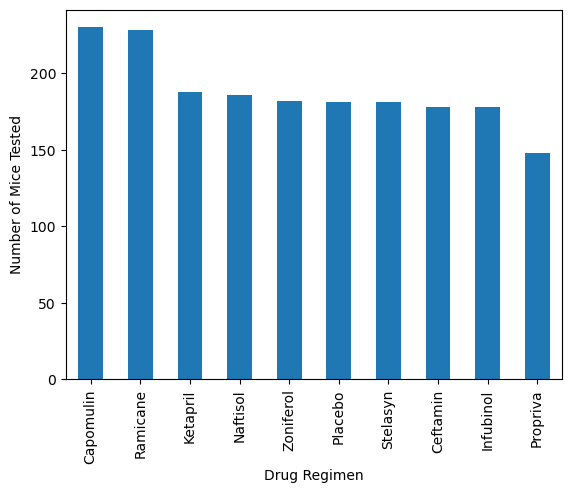

In [181]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_by_drug = timepoints_by_drug.sort_values(ascending=False)
timepoints_by_drug.plot(kind='bar',xlabel='Drug Regimen', ylabel='Number of Mice Tested')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

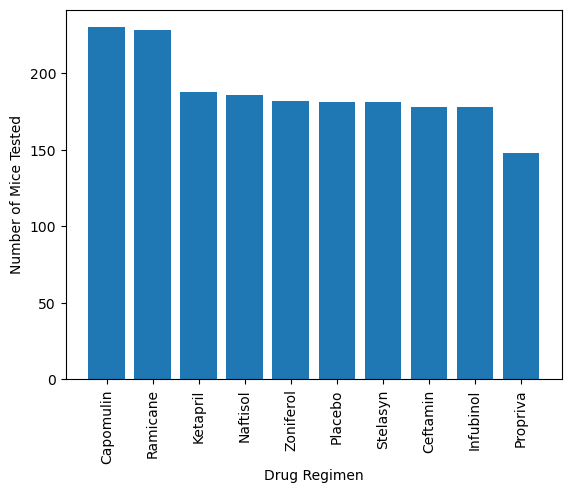

In [182]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoints_by_drug.index, timepoints_by_drug.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

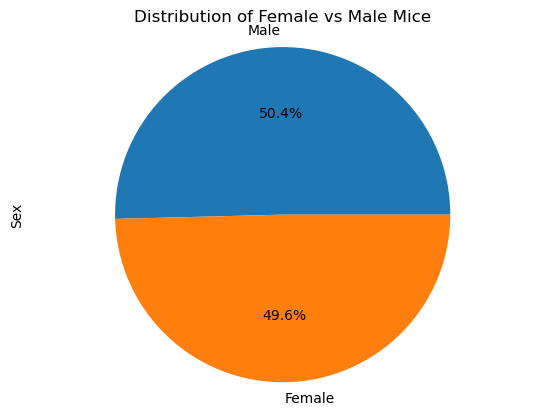

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_by_sex = cleaned_df.groupby('Sex')['Mouse ID'].nunique()
mice_by_sex = mice_by_sex.reindex(['Male', 'Female'])
mice_by_sex.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title("Distribution of Female vs Male Mice")

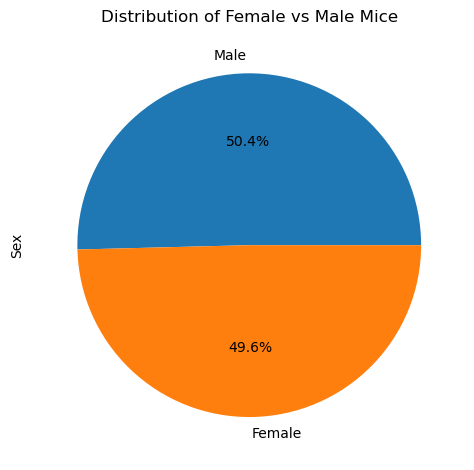

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_by_sex.values, labels=mice_by_sex.index, autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice")
plt.ylabel('Sex')
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selected_df = cleaned_df.loc[cleaned_df['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volumes = selected_df.groupby(['Mouse ID','Drug Regimen'])['Tumor Volume'].last().to_frame()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [163]:
# Create list to hold treatment names and tumor volume data
for regimen in selected_regimens:
    regimen_df = final_tumor_volumes.loc[final_tumor_volumes.index.get_level_values(1) == regimen]
    regimen_volumes = regimen_df['Tumor Volume'].tolist()
    quartiles = np.percentile(regimen_volumes, [25, 50, 75])
    lower_bound = quartiles[0] - (1.5 * (quartiles[2] - quartiles[0]))
    upper_bound = quartiles[2] + (1.5 * (quartiles[2] - quartiles[0]))
    outliers = [x for x in regimen_volumes if x < lower_bound or x > upper_bound]
    print(f'Outliers for {regimen}: {outliers}')

Outliers for Capomulin: []
Outliers for Ramicane: []
Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []


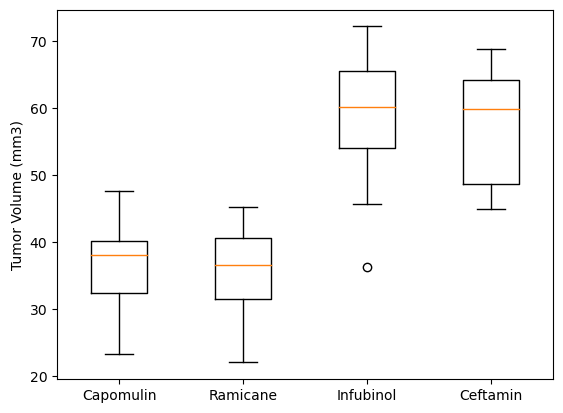

In [167]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(regimen_volumes.values(), labels=regimen_volumes.keys())
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

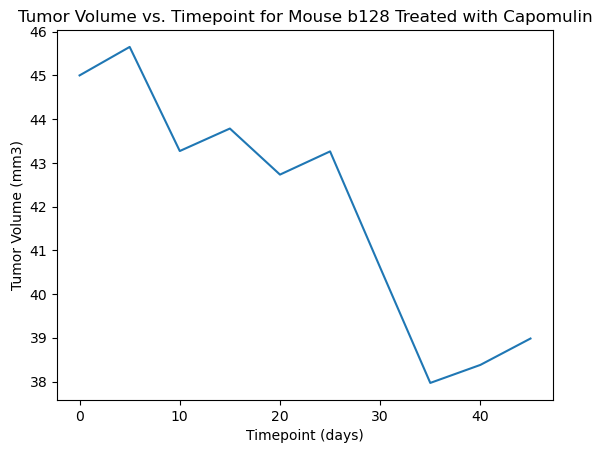

In [179]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select data for a mouse treated with Capomulin
capomulin_df = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin')]
mouse_id = 'b128'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

# Create a line plot of tumor volume vs. time point
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} Treated with Capomulin')
plt.show()


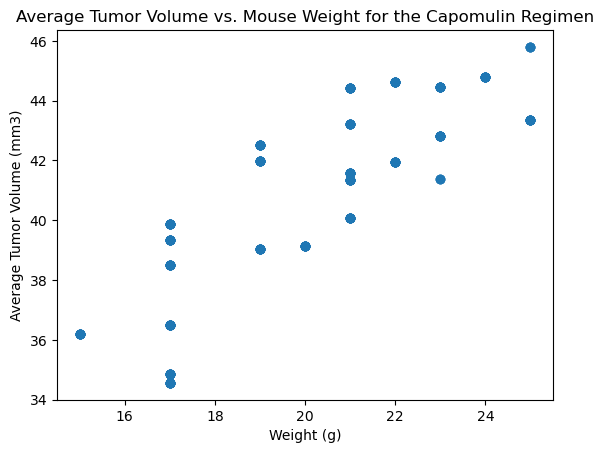

In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Select data for the Capomulin regimen
capomulin_df = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin')]

# Groupby Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby(['Mouse ID'])['Tumor Volume'].mean().to_frame()

# Merge the average tumor volume DataFrame with the original DataFrame on Mouse ID
merged_df = pd.merge(capomulin_df, average_tumor_volume, on='Mouse ID')

plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume_y'], marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation coefficient is 0.83


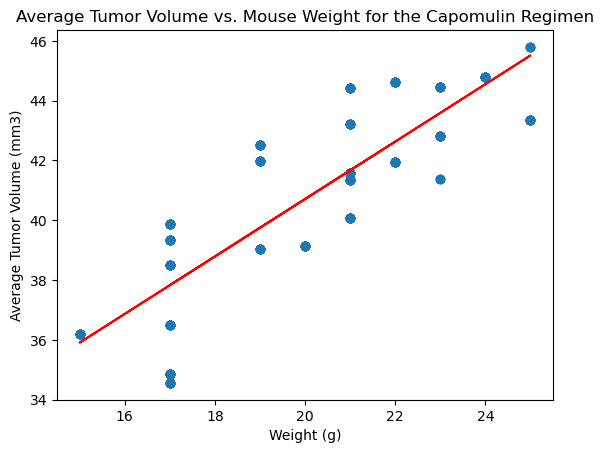

In [177]:
correlation = merged_df[['Weight (g)', 'Tumor Volume_y']].corr()
print(f'The correlation coefficient is {correlation.iloc[0,1]:.2f}')

weights = merged_df['Weight (g)']
tumor_volumes = merged_df['Tumor Volume_y']

slope, intercept = np.polyfit(weights, tumor_volumes, 1)

# Create a scatter plot of average tumor volume vs. mouse weight with the linear regression line
plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume_y'], marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.plot(merged_df['Weight (g)'], intercept + slope*merged_df['Weight (g)'], 'r')
plt.show()
